In [43]:
%config IPCompleter.greedy=True

In [89]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from termcolor import colored

In [90]:
data = np.loadtxt('ex2data1.txt', delimiter=",")

In [91]:
print(data[:5])

[[ 34.62365962  78.02469282   0.        ]
 [ 30.28671077  43.89499752   0.        ]
 [ 35.84740877  72.90219803   0.        ]
 [ 60.18259939  86.3085521    1.        ]
 [ 79.03273605  75.34437644   1.        ]]


In [92]:
def plotData(data):
    plt.figure(figsize=(10,6))
    plt.xlabel("Exam 1 Score")
    plt.ylabel("Exam 2 Score")
    plt.scatter(data[data[:,2] == 1][:,0], 
                data[data[:,2] == 1][:,1], 
                color='k', marker='+', label="Admitted")
    plt.scatter(data[data[:,2] == 0][:,0], 
                data[data[:,2] == 0][:,1], 
                color='y', marker='o', label="Not admitted")
    plt.grid(True)
    plt.legend()
    plt.show()

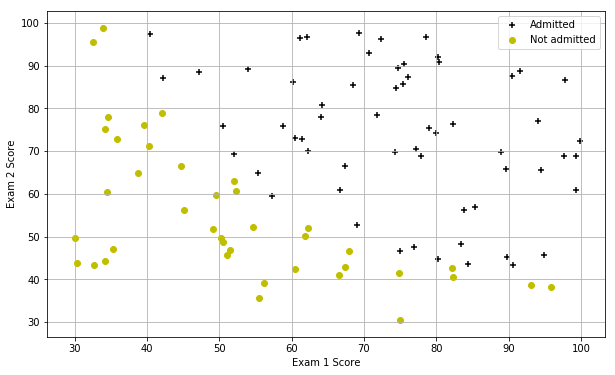

In [93]:
plotData(data)

In [94]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

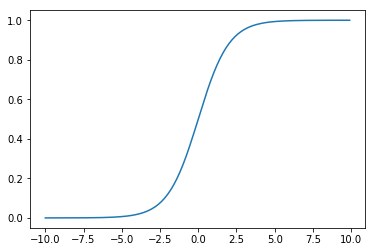

In [95]:
def printSigmoid():
    x = np.arange(-10, 10, 0.1)
    plt.figure()
    plt.plot(x, sigmoid(x))
    plt.show()

printSigmoid()

### Prepare Data

In [118]:
X_ = data[:,:2]
X_ = np.concatenate((np.ones((len(y), 1)), X_ ), axis=1)
y = data[:,2]
initial_theta = np.zeros(len(X_[0]))
print(colored("X_", "blue"), X_[:5], 
      colored("\ny", "blue"), y[:5], 
      colored("\ntheta", "blue"), theta)

X_ [[  1.          34.62365962  78.02469282]
 [  1.          30.28671077  43.89499752]
 [  1.          35.84740877  72.90219803]
 [  1.          60.18259939  86.3085521 ]
 [  1.          79.03273605  75.34437644]] 
y [ 0.  0.  0.  1.  1.] 
theta [ 0.  0.  0.]


In [127]:
def h(X, theta):
    return sigmoid(X.dot(theta))

h(X_, initial_theta)

array([ 0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,
        0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,
        0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,
        0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,
        0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,
        0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,
        0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,
        0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,
        0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,
        0.5])

In [154]:
def costFunction(theta, X, y):
    hypothesis = h(X, theta)
    term_1 = -y.dot(np.log(hypothesis))
    term_2 = (1-y).dot(np.log(1-hypothesis))
    J = np.sum(term_1 - term_2) / len(y)
    return J
print("cost(J) with initial theta: %0.3f" % costFunction(initial_theta, X_, y))

cost(J) with initial theta: 0.693


In [155]:
from scipy import optimize

In [166]:
def optimizeTheta(theta, X, y):
    return optimize.fmin(costFunction, theta, args=(X, y), maxiter = 400, full_output=True)

In [171]:
result = optimizeTheta(initial_theta, X_, y)
optimized_theta = result[0]

costFunction(optimized_theta, X_, y)

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 157
         Function evaluations: 287


0.2034977015902151

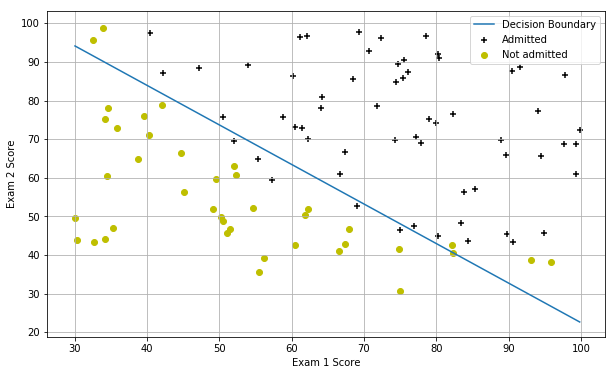

In [209]:
def plotTheta(X, y, theta):
    plt.figure(figsize=(10,6))
    plt.xlabel("Exam 1 Score")
    plt.ylabel("Exam 2 Score")
    plt.scatter(data[y == 1][:,0], 
                data[y == 1][:,1], 
                color='k', marker='+', label="Admitted")
    plt.scatter(data[y == 0][:,0], 
                data[y == 0][:,1], 
                color='y', marker='o', label="Not admitted")
    
    x1 = np.array([np.min(X[:,1]), np.max(X[:,1])])
    x2 = (-1.0/theta[2]) * (theta[1] * x1 + theta[0])
    plt.plot(x1, x2, label="Decision Boundary")
    
    plt.grid(True)
    plt.legend()
    plt.show()
plotTheta(X_, y, optimized_theta)

In [212]:
test_x = np.array([1, 45, 85])
print("test_x for (1, 45, 85): %.3f" % h(test_x, optimized_theta))

test_x for (1, 45, 85): 0.776
